In [13]:
import pickle
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [14]:
with open("./traffic-signs-data/train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("./traffic-signs-data/valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("./traffic-signs-data/test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [15]:
X_train, y_train = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [16]:
X_train.shape

(34799, 32, 32, 3)

In [17]:
y_train.shape

(34799,)

36

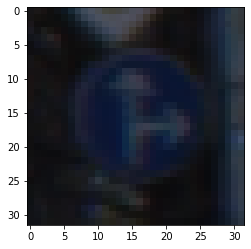

In [18]:
i = 1001
plt.imshow(X_train[i])
y_train[i]

In [19]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

X_train_gray = np.sum(X_train/3, axis=3, keepdims=True)
X_test_gray  = np.sum(X_test/3, axis=3, keepdims=True)
X_validation_gray  = np.sum(X_validation/3, axis=3, keepdims=True) 

X_train_gray_norm = (X_train_gray - 128)/128 
X_test_gray_norm = (X_test_gray - 128)/128
X_validation_gray_norm = (X_validation_gray - 128)/128

In [20]:
X_train_gray.shape

(34799, 32, 32, 1)

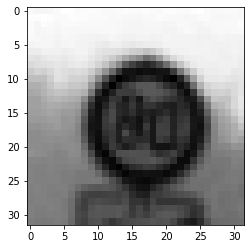

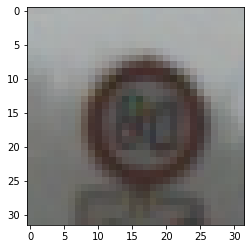

In [21]:
i = 610
plt.imshow(X_train_gray[i].squeeze(), cmap='gray')
plt.figure()
plt.imshow(X_train[i])


In [22]:
#모델 학습

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

from sklearn.model_selection import train_test_split

In [23]:
image_shape = X_train_gray[i].shape

In [25]:
cnn_model = Sequential()

cnn_model.add(Conv2D(filters=6, kernel_size=(5, 5), activation='relu', input_shape=(32,32,1)))
cnn_model.add(AveragePooling2D())

cnn_model.add(Conv2D(filters=16, kernel_size=(5, 5), activation='relu'))
cnn_model.add(AveragePooling2D())

cnn_model.add(Flatten())

cnn_model.add(Dense(units=120, activation='relu'))

cnn_model.add(Dense(units=84, activation='relu'))

cnn_model.add(Dense(units=43, activation = 'softmax'))

In [26]:
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001),metrics =['accuracy'])

C:\anaconda\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [29]:
history = cnn_model.fit(X_train_gray_norm,
                        y_train,
                        batch_size=500,
                        epochs=50,
                        verbose=1,
                        validation_data = (X_validation_gray_norm,y_validation))

Epoch 1/50
70/70 [==============================] - 3s 40ms/step - loss: 3.0635 - accuracy: 0.2034 - val_loss: 2.4248 - val_accuracy: 0.3660
Epoch 2/50
70/70 [==============================] - 3s 38ms/step - loss: 1.5640 - accuracy: 0.5630 - val_loss: 1.3547 - val_accuracy: 0.5941
Epoch 3/50
70/70 [==============================] - 3s 38ms/step - loss: 0.9172 - accuracy: 0.7388 - val_loss: 0.9358 - val_accuracy: 0.7218
Epoch 4/50
70/70 [==============================] - 3s 38ms/step - loss: 0.6355 - accuracy: 0.8253 - val_loss: 0.7773 - val_accuracy: 0.7592
Epoch 5/50
70/70 [==============================] - 3s 38ms/step - loss: 0.5076 - accuracy: 0.8616 - val_loss: 0.6916 - val_accuracy: 0.7880
Epoch 6/50
70/70 [==============================] - 3s 38ms/step - loss: 0.4149 - accuracy: 0.8907 - val_loss: 0.6239 - val_accuracy: 0.8127
Epoch 7/50
70/70 [==============================] - 3s 38ms/step - loss: 0.3519 - accuracy: 0.9095 - val_loss: 0.6011 - val_accuracy: 0.8259
Epoch 8/50
70

In [30]:
#평가

In [31]:
score = cnn_model.evaluate(X_test_gray_norm, y_test,verbose=0)
print('Test Accuracy : {:.4f}'.format(score[1]))

Test Accuracy : 0.8832


In [32]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

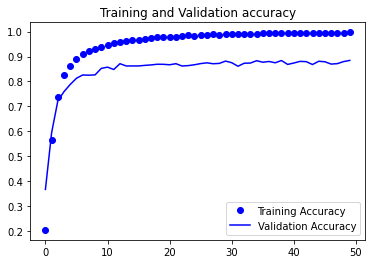

In [34]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend()

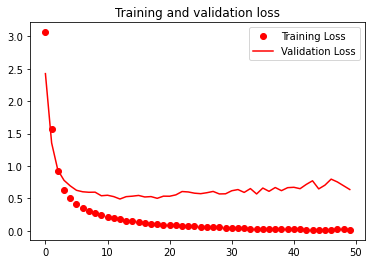

In [35]:
plt.plot(epochs, loss, 'ro', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [42]:
#predicted_classes = cnn_model.predict_classes(X_test_gray_norm)

prob = cnn_model.predict(X_test_gray_norm)
predicted_classes = prob.argmax(axis = -1)

395/395 [==============================] - 1s 2ms/step


In [43]:
y_true = y_test

<AxesSubplot:>

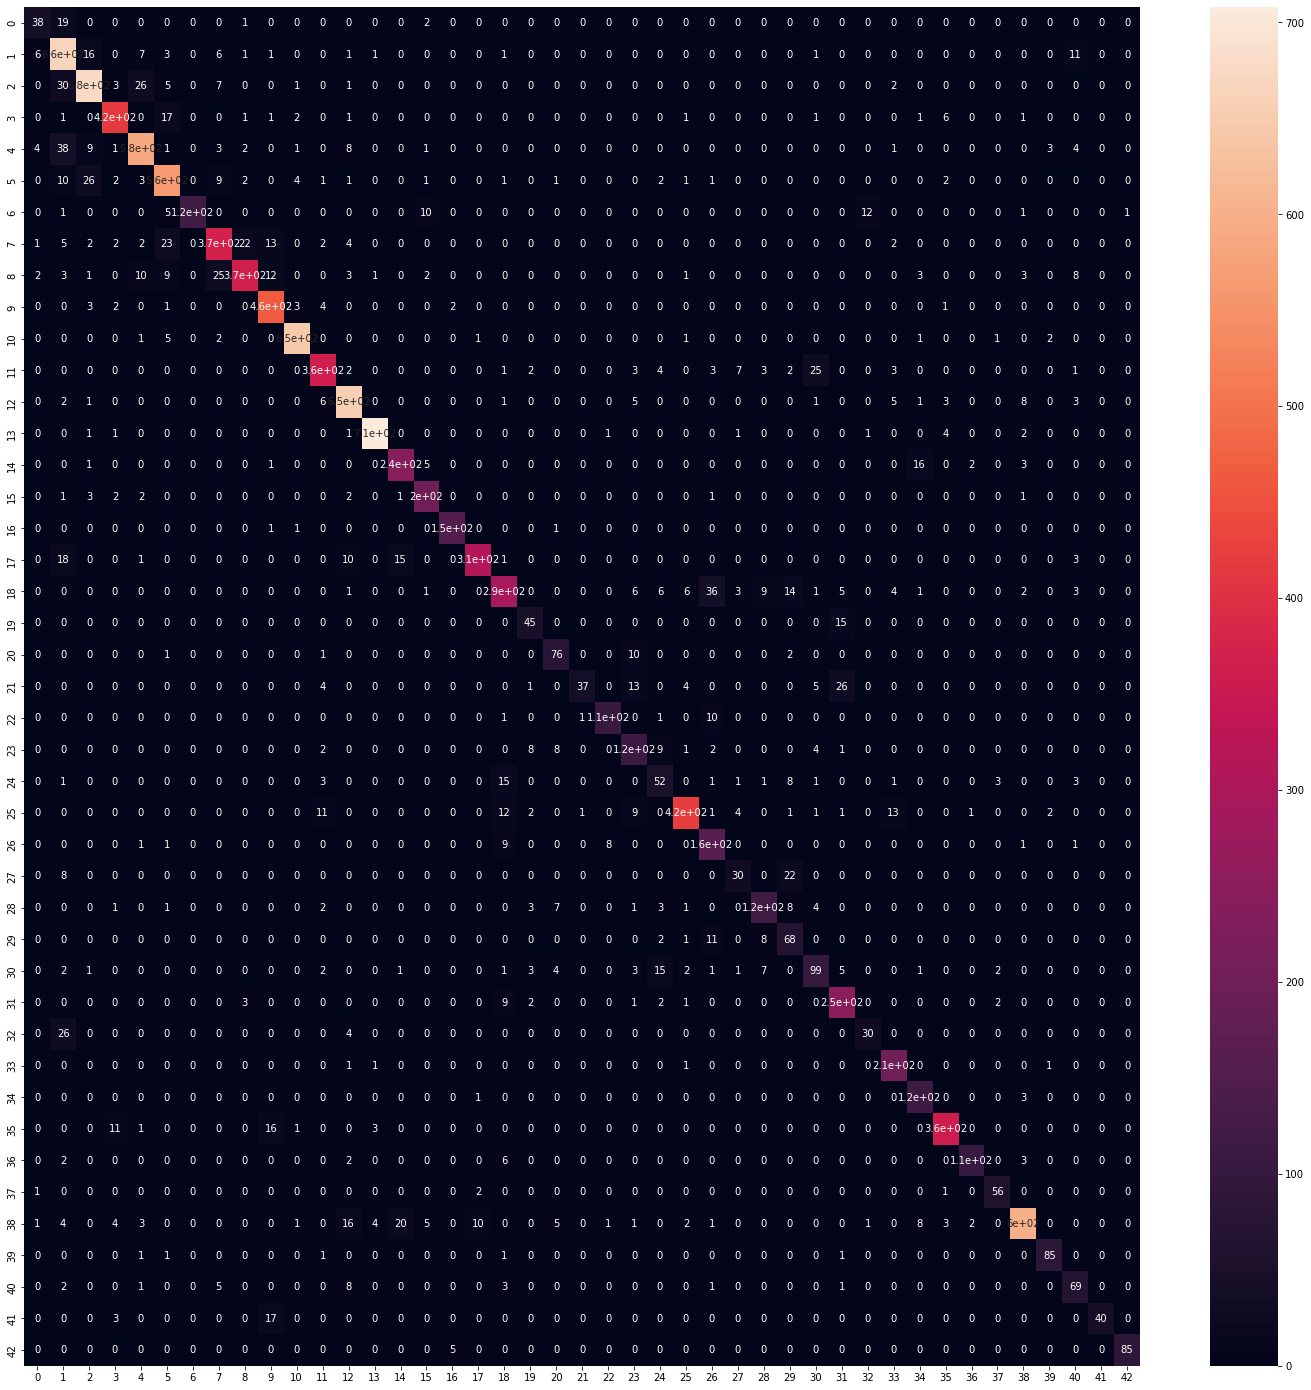

In [44]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (25,25))
sns.heatmap(cm, annot=True)

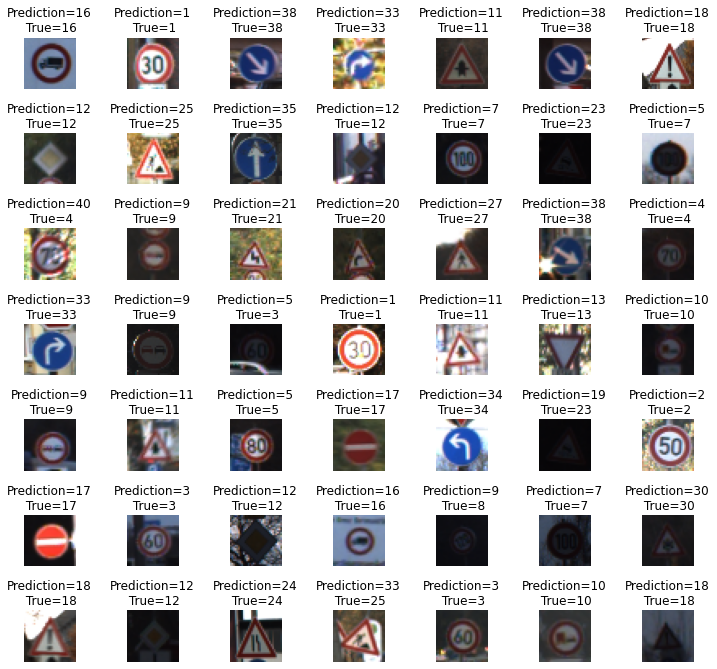

In [45]:
L = 7
W = 7
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel() # 

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i])
    axes[i].set_title("Prediction={}\n True={}".format(predicted_classes[i], y_true[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=1)